In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'/Users/mac/Documents/Python Machine Learning/cats_and_dogs_small/train'
validation_dir = r'/Users/mac/Documents/Python Machine Learning/cats_and_dogs_small/validation'
test_dir = r'/Users/mac/Documents/Python Machine Learning/cats_and_dogs_small/test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale =1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

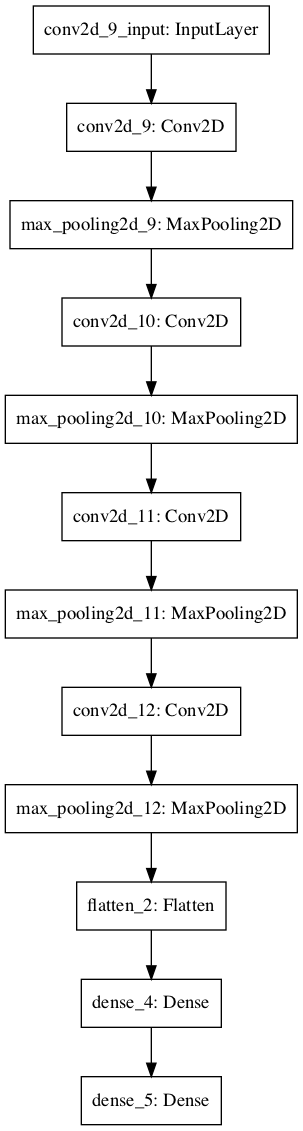

In [46]:
import pydot
keras.utils.plot_model(model)

In [9]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [48]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data = validation_generator,
        validation_steps = 50)

Epoch 1/20
100/100 [==============================] - 450s 5s/step - loss: 0.6902 - acc: 0.5265 - val_loss: 0.6670 - val_acc: 0.6390
Epoch 2/20
100/100 [==============================] - 325s 3s/step - loss: 0.6491 - acc: 0.6195 - val_loss: 0.6212 - val_acc: 0.6720
Epoch 3/20
100/100 [==============================] - 329s 3s/step - loss: 0.5890 - acc: 0.6845 - val_loss: 0.6434 - val_acc: 0.6320
Epoch 4/20
100/100 [==============================] - 323s 3s/step - loss: 0.5560 - acc: 0.7205 - val_loss: 0.5942 - val_acc: 0.6770
Epoch 5/20
100/100 [==============================] - 322s 3s/step - loss: 0.5338 - acc: 0.7315 - val_loss: 0.6120 - val_acc: 0.6690
Epoch 6/20
100/100 [==============================] - 324s 3s/step - loss: 0.5093 - acc: 0.7445 - val_loss: 0.5637 - val_acc: 0.7010
Epoch 7/20
100/100 [==============================] - 322s 3s/step - loss: 0.4845 - acc: 0.7660 - val_loss: 0.5532 - val_acc: 0.7050
Epoch 8/20
100/100 [==============================] - 322s 3s/step - 

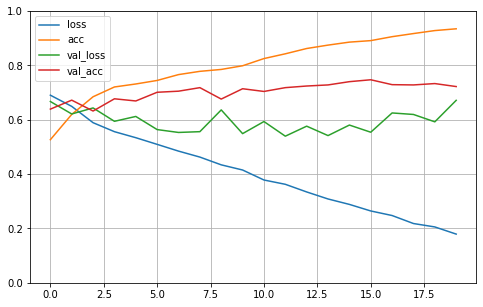

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [50]:
model.save("model.h5")

In [12]:
from tensorflow.keras import backend as K
K.clear_session()
del model

In [11]:
train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150,150),
            batch_size=32,
            class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150,150),
            batch_size=32,
            class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [26]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data = validation_generator,
        validation_steps = 50)

Epoch 1/100
  3/100 [..............................] - ETA: 1:16:04 - loss: 0.3762 - acc: 0.8958

KeyboardInterrupt: 

In [ ]:
model.save("project_cnn.h5")

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# VGG16

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150,150),
            batch_size=32,
            class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150,150),
            batch_size=32,
            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

58892288/58889256 [==============================] - 123s 2us/step


In [20]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

In [24]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [25]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50,
        callbacks=[checkpoint_cb])

Epoch 1/30
 31/100 [========>.....................] - ETA: 18:17:25 - loss: 0.6026 - acc: 0.6613

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()